In [1]:
# Load Python libraries
from sklearn import cross_validation, grid_search, metrics, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lappy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lappy\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [73]:
#reading training data

df = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/train.csv')
df = df.sample(frac=0.01)

In [74]:
#using songs and members dataset

songs = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [75]:
#removing null values
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.262965
source_screen_name         5.755415
source_type                0.317185
target                     0.000000
song_length                0.006777
genre_ids                  1.573725
artist_name                0.006777
composer                  22.703120
lyricist                  43.096484
language                   0.006777
city                       0.000000
bd                         0.000000
gender                    40.026297
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [76]:
#removing NA values from df
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [77]:
# creating a column of registration_init_date  using month, year and day
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# creating expiration date using year, date, month
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day



In [78]:
# conversion into categorical values
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [79]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [80]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
# Drop columns
df = df.drop(['expiration_date', 'lyricist'], 1)


In [82]:
# Model with the best estimator
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(df[df.columns[df.columns != 'target']], df.target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [84]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [85]:
#df.columns

In [86]:

len(df)

73774

In [87]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

model = ensemble.GradientBoostingClassifier()
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])



In [38]:
model.score(df[df.columns[df.columns != 'target']], df.target)

0.63236118872220526

In [106]:
df_test=pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/test.csv')
songs = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes
    

In [107]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [108]:
#del df_test['source_system_tab']

In [109]:
del df_test['expiration_date_month']

In [110]:
del df_test['expiration_date_day']

In [111]:
del df_test['registration_init_time_month']

In [112]:
del df_test['registration_init_time_year']

In [113]:
del df_test['registration_init_time_day']

In [47]:
#del df_test['genre_ids']

In [114]:
del df_test['bd']
del df_test['city']
del df_test['language']
del df_test['gender']

In [115]:
del df_test['registered_via']

In [116]:
#del df_test['msno']

In [117]:
#del df_test['song_id']

In [118]:
len(df.columns)

12

In [119]:
len(df_test.columns)

12

In [104]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'registration_init_time', 'expiration_date_year'],
      dtype='object')

In [105]:
df_test.columns

Index(['id', 'source_system_tab', 'source_screen_name', 'source_type',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'language',
       'registration_init_time', 'expiration_date_year'],
      dtype='object')

In [120]:
predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [121]:
len(predictions)

2556790

In [106]:
predictions = predictions/3

submission = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/sample_submission.csv')
#submission = submission.sample(frac=0.6)
submission.target=predictions
submission.to_csv('gb.csv',index=False)

In [122]:
X_array=df['target'].values

In [123]:
len(X_array)

73774

In [125]:
predictions1=predictions[0:73774]
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(X_array,predictions1, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.50      0.55      0.52     36496
    class 1       0.51      0.45      0.48     37278

avg / total       0.50      0.50      0.50     73774



In [126]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

In [127]:
#plotting roc curve

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

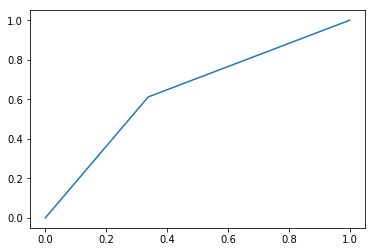

In [128]:
plt.show()

In [129]:
roc_auc

0.63690505795121855